In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv("data/cbb.csv")
df20 = pd.read_csv("data/cbb20.csv")
df21 = pd.read_csv("data/cbb21.csv")
df = df.append(df20)
df = df.append(df21)

In [4]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,RK
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016.0,NaN
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015.0,NaN
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018.0,NaN
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019.0,NaN
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017.0,NaN


In [6]:
df.drop("YEAR",axis=1,inplace=True)

In [7]:
len(df)

3155

In [8]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,RK
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.00000,3155.000000,3155.000000,3155.000000,...,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,544.000000,353.000000
mean,30.326783,15.822187,103.033534,103.035721,0.494284,49.799461,49.98168,18.803740,18.736070,29.410523,...,35.133154,35.398827,48.971442,49.131189,34.188399,34.366022,67.934263,-7.572773,8.801471,177.000000
std,3.982607,6.493186,7.315549,6.555014,0.255835,3.103111,2.91860,2.102912,2.215394,4.230349,...,5.397775,6.349662,3.377538,3.348170,2.791483,2.463415,3.159904,6.804114,4.674794,102.046558
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.60000,11.900000,10.200000,14.200000,...,19.600000,19.700000,37.700000,37.700000,24.800000,26.100000,57.200000,-25.200000,1.000000,1.000000
25%,29.000000,11.000000,98.000000,98.300000,0.281900,47.800000,48.00000,17.400000,17.200000,26.600000,...,31.300000,30.850000,46.700000,46.800000,32.300000,32.700000,65.900000,-12.600000,5.000000,89.000000
50%,31.000000,16.000000,102.700000,103.100000,0.476200,49.700000,49.90000,18.700000,18.600000,29.400000,...,34.900000,34.900000,48.900000,49.100000,34.100000,34.300000,68.000000,-7.900000,9.000000,177.000000
75%,33.000000,20.000000,107.800000,107.500000,0.713900,51.800000,52.00000,20.200000,20.100000,32.200000,...,38.700000,39.400000,51.200000,51.400000,36.000000,36.000000,70.000000,-3.000000,13.000000,265.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.10000,27.100000,28.500000,43.600000,...,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,353.000000


In [9]:
df.drop(["POSTSEASON","RK"],axis=1,inplace=True)

In [10]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED'],
      dtype='object')

In [11]:
df["WIN_PCT"] = df["W"]/df["G"]

In [12]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,WIN_PCT
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1.0,0.825000
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,1.0,0.900000
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,3.0,0.825000
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,3.0,0.815789
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,1.0,0.948718


In [37]:
big_east = df[df["CONF"]=="BE"]

In [38]:
big_east.WIN_PCT.mean()

0.5963315475856621

In [40]:
SEC = df[df["CONF"]=="SEC"]
SEC.WIN_PCT.mean()

0.5723587478792048

In [46]:
WCC = df[df["CONF"]=="WCC"]
WCC.WIN_PCT.mean()

0.5477532970935726

In [47]:
ACC = df[df["CONF"]=="ACC"]
ACC.WIN_PCT.mean()

0.594378876566332

In [49]:
P12 = df[df["CONF"]=="P12"]
P12.WIN_PCT.mean()

0.5762606002746058

In [50]:
B12 = df[df["CONF"]=="B12"]
B12.WIN_PCT.mean()

0.6052180833529733

In [51]:
B10 = df[df["CONF"]=="B10"]
B10.WIN_PCT.mean()

0.5934010642769297

In [13]:
df.CONF.unique()

array(['ACC', 'B10', 'B12', 'WCC', 'SEC', 'BE', 'Amer', 'P12', 'A10',
       'MVC', 'AE', 'ASun', 'BSky', 'BSth', 'BW', 'CAA', 'CUSA', 'Horz',
       'Ind', 'Ivy', 'MAAC', 'MAC', 'MEAC', 'MWC', 'NEC', 'OVC', 'Pat',
       'SB', 'SC', 'Slnd', 'Sum', 'SWAC', 'WAC', 'ind', 'GWC'],
      dtype=object)

In [14]:
p6 = ['A10',
       'MVC', 'AE', 'ASun', 'BSky', 'BSth', 'BW', 'CAA', 'CUSA', 'Horz',
       'Ind', 'Ivy', 'MAAC', 'MAC', 'MEAC', 'MWC', 'NEC', 'OVC', 'Pat',
       'SB', 'SC', 'Slnd', 'Sum', 'SWAC', 'WAC', 'ind', 'GWC','WCC','Amer']
power = df[~df.CONF.isin(p6)]

In [15]:
P12 = power[power["CONF"]=="P12"]
P12.WIN_PCT.mean()

0.5762606002746058

/Users/jackpiccione/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


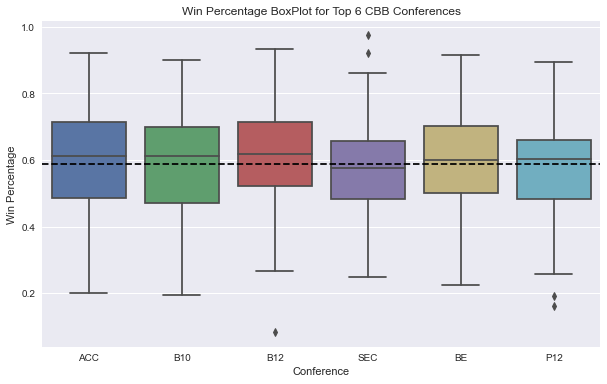

In [16]:
import seaborn as sns
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot('CONF', 'WIN_PCT', data= power)
ax.set_title('Win Percentage BoxPlot for Top 6 CBB Conferences')
ax.set_ylabel('Win Percentage')
ax.set_xlabel('Conference')
ax.axhline(power["WIN_PCT"].mean(),
           linestyle="--",color='black');

In [17]:
power_seed = df.dropna()

In [18]:
p6_seeds = power_seed[~power_seed.CONF.isin(p6)]

/Users/jackpiccione/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


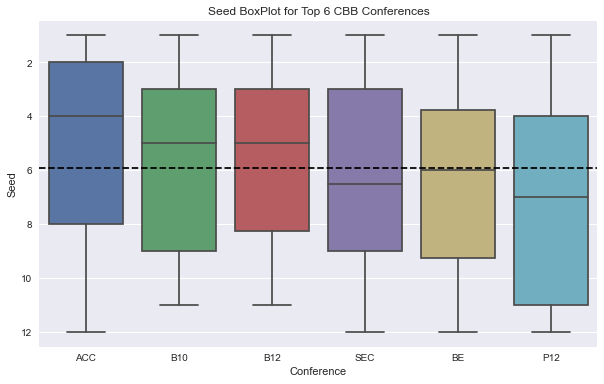

In [19]:
import seaborn as sns
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot('CONF', 'SEED', data= p6_seeds)
ax.invert_yaxis()
ax.set_title('Seed BoxPlot for Top 6 CBB Conferences')
ax.set_ylabel('Seed')
ax.set_xlabel('Conference')
ax.axhline(p6_seeds["SEED"].mean(),
           linestyle="--",color='black');

In [20]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'WIN_PCT'],
      dtype='object')

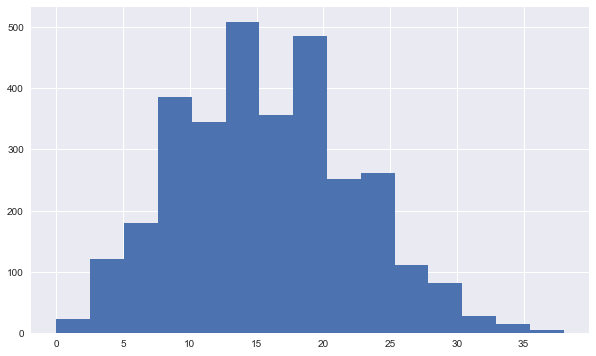

In [26]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 6))
ax = plt.hist('W',data= df,bins=15)

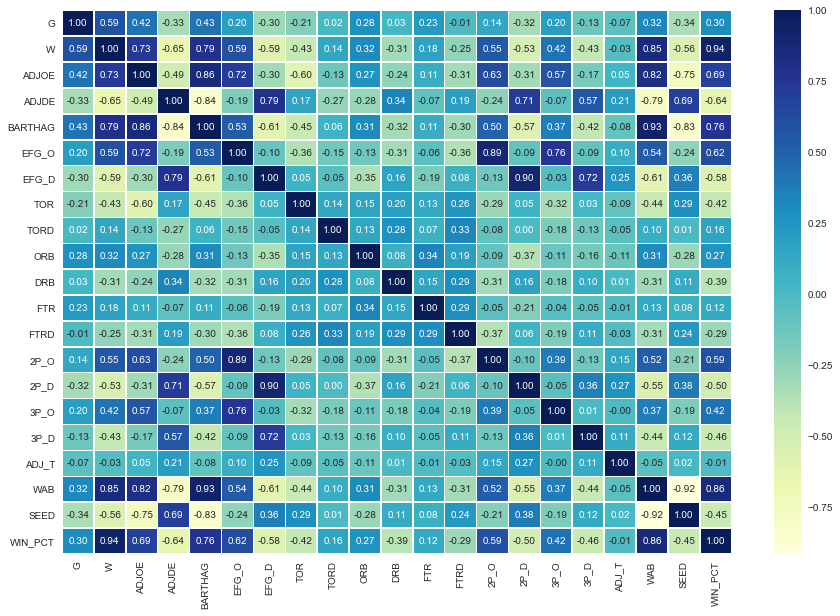

In [27]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [28]:
df.drop(["ADJ_T","FTR","TORD"],axis=1,inplace=True)

In [29]:
df.dtypes

TEAM        object
CONF        object
G            int64
W            int64
ADJOE      float64
ADJDE      float64
BARTHAG    float64
EFG_O      float64
EFG_D      float64
TOR        float64
ORB        float64
DRB        float64
FTRD       float64
2P_O       float64
2P_D       float64
3P_O       float64
3P_D       float64
WAB        float64
SEED       float64
WIN_PCT    float64
dtype: object

In [30]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,ORB,DRB,FTRD,2P_O,2P_D,3P_O,3P_D,WAB,SEED,WIN_PCT
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,40.7,30.0,30.4,53.9,44.6,32.7,36.2,8.6,1.0,0.825000
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,32.1,23.7,22.4,54.8,44.7,36.5,37.5,11.3,1.0,0.900000
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,25.5,24.9,30.0,54.7,46.8,35.2,33.2,6.9,3.0,0.825000
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,27.4,28.7,36.6,52.8,41.9,36.5,29.7,7.0,3.0,0.815789
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,30.0,26.2,26.9,56.3,40.0,38.2,29.0,7.7,1.0,0.948718


In [31]:
df1 = df.dropna()
df1

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,ORB,DRB,FTRD,2P_O,2P_D,3P_O,3P_D,WAB,SEED,WIN_PCT
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,40.7,30.0,30.4,53.9,44.6,32.7,36.2,8.6,1.0,0.825000
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,32.1,23.7,22.4,54.8,44.7,36.5,37.5,11.3,1.0,0.900000
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,25.5,24.9,30.0,54.7,46.8,35.2,33.2,6.9,3.0,0.825000
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,27.4,28.7,36.6,52.8,41.9,36.5,29.7,7.0,3.0,0.815789
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,30.0,26.2,26.9,56.3,40.0,38.2,29.0,7.7,1.0,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Mount St. Mary's,NEC,22,12,95.7,100.6,0.3593,48.7,45.5,20.1,31.7,24.6,24.6,47.7,45.6,33.7,30.1,-7.2,16.0,0.545455
64,Hartford,AE,23,15,97.3,99.6,0.4345,50.4,47.6,19.0,24.8,28.6,25.0,51.3,50.7,32.7,28.7,-4.9,16.0,0.652174
65,Norfolk St.,MEAC,21,16,99.4,104.1,0.3698,49.7,47.4,17.8,28.8,28.7,42.0,46.1,47.2,37.4,31.7,-5.0,16.0,0.761905
66,Texas Southern,SWAC,23,16,97.3,103.5,0.3307,48.3,46.5,21.4,32.9,25.7,33.8,51.0,45.2,27.7,32.4,-4.5,16.0,0.695652


In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X = df1.drop("SEED",axis=1)
y = df1["SEED"]

cats = ["TEAM", "CONF"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 cats)],
                                 remainder="passthrough")
trans_X = transformer.fit_transform(X)
trans_X

X_train, X_test,y_train,y_test = train_test_split(trans_X,y,test_size=0.2)

model=RandomForestRegressor().fit(X_train,y_train)
model.score(X_test,y_test)

0.9236146427571309

In [33]:
y_preds = model.predict(X_test)

In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression model metrics on the test set
R^2: 92.36%
MAE: 1.05348623853211
MSE: 1.928529357798165


In [24]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10,100,200,500,1200],
        "max_depth":[None,5,10,20,30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X = df1.drop("SEED",axis=1)
y = df1["SEED"]

cats = ["TEAM", "CONF"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 cats)],
                                 remainder="passthrough")
trans_X = transformer.fit_transform(X)
trans_X

X_train, X_test,y_train,y_test = train_test_split(trans_X,y,test_size=0.2)

model=RandomForestRegressor()
rs_model = RandomizedSearchCV(estimator=model,
                           param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10;

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1200]},
                   verbose=2)

In [26]:
rs_model.score(X_test,y_test)

0.925910177901612

In [27]:
rs_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X = df1.drop("SEED",axis=1)
y = df1["SEED"]

cats = ["TEAM", "CONF"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 cats)],
                                 remainder="passthrough")
trans_X = transformer.fit_transform(X)
trans_X

X_train, X_test,y_train,y_test = train_test_split(trans_X,y,test_size=0.2)

model=RandomForestRegressor(n_estimators = 1200,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 20)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.924674851894022

In [17]:
y_preds = model.predict(X_test)

In [18]:
model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.88440903e-08,
       0.00000000e+00, 0.00000000e+00, 4.21824192e-06, 1.89885337e-06,
       3.18413889e-07, 0.00000000e+00, 2.81746198e-07, 0.00000000e+00,
       5.83749145e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.66377612e-07, 1.33304002e-06, 4.14743429e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.83884085e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.40188768e-06,
       0.00000000e+00, 2.49982605e-06, 1.60025354e-06, 4.43209770e-06,
       1.70055679e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.89729460e-08, 0.00000000e+00, 0.00000000e+00, 5.17744908e-07,
       0.00000000e+00, 2.94070485e-04, 6.46633333e-08, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.40715346e-07, 0.00000000e+00, 2.98933906e-06,
      

In [19]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

In [35]:
compare = pd.DataFrame({'Prediction': y_preds, 'Test Data' : y_test})

In [36]:
compare.head(15)

,Prediction,Test Data
2436,1.63,2.0
2236,11.18,12.0
2336,15.94,16.0
56,13.74,14.0
66,15.48,16.0
2056,6.08,10.0
2111,3.83,3.0
2055,2.49,4.0
2063,5.27,6.0
2361,14.13,14.0


In [48]:
compare["difference"] = compare["Test Data"] - compare["Prediction"]

In [47]:
df1.at[2056,'TEAM']

'Ohio St.'

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression model metrics on the test set
R^2: 92.47%
MAE: 1.0572716510893116
MSE: 1.9017618657067241


In [48]:
cv_mae = cross_val_score(model,
                        trans_X,
                        y,
                        cv=5,
                        scoring = "neg_mean_absolute_error")
cv_mae.mean()

-1.0417824167850642